# Do it! 쉽게 배우는 파이썬 데이터 분석 - 7장

## 07-1 결측치 정제하기

In [ ]:
import pandas as pd
import numpy as np
import urllib.request

df = pd.DataFrame({'sex':['M','F',np.nan,'M','F'],
                    'score':[5,4,3,4,np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [ ]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [ ]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [ ]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [ ]:
df_nomiss = df.dropna(subset=['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/youngwoos/Doit_Python/main/Data/exam.csv','exam.csv')

('exam.csv', <http.client.HTTPMessage at 0x1064ad6d0>)

In [ ]:
exam = pd.read_csv('exam.csv')
exam.loc[[2,7,14],['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [ ]:
exam['math'].mean()

55.23529411764706

In [ ]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [ ]:
exam['math'].isna().sum()

0

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/youngwoos/Doit_Python/main/Data/mpg.csv','mpg.csv')

('mpg.csv', <http.client.HTTPMessage at 0x12f8093a0>)

In [ ]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[64,123,130,152,211],'hwy'] = np.nan
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact


In [ ]:
mpg[['drv','hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

In [ ]:
mpg['hwy'] = mpg['hwy'].dropna()
mpg.groupby('drv').agg({'hwy':'mean'})

,hwy
drv,
4,19.242424
f,28.200000
r,21.000000


## 07-2 이상치 정제하기

In [ ]:
df = pd.DataFrame({'sex':[1,2,1,3,2,1],
                    'score':[5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [ ]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [ ]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [ ]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [ ]:
df['sex'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,5.0,5
1,4.0,4
2,3.0,3
3,4.0,4
4,2.0,2
5,NaN,6


In [ ]:
df.dropna(subset=['sex','score']).groupby('sex').agg(mean_socre=('score','mean'))

,mean_socre
sex,
2.0,2.0
3.0,3.0
4.0,4.0
5.0,5.0


<AxesSubplot:ylabel='hwy'>

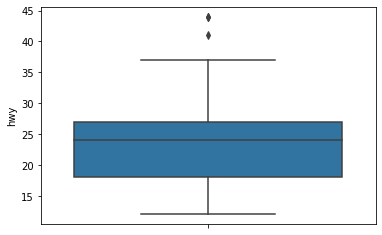

In [ ]:
mpg = pd.read_csv('mpg.csv')

import seaborn as sns
sns.boxplot(data=mpg, y='hwy')

In [ ]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [ ]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [ ]:
iqr = pct75 - pct25
iqr

9.0

In [ ]:
pct25 - 1.5 * iqr

4.5

In [ ]:
pct75 + 1.5 * iqr

40.5

In [ ]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])
mpg['hwy'].isna().sum()

3

In [ ]:
mpg.dropna(subset=['hwy']).groupby('drv').aggregate(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [ ]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[[9,13,57,92],'drv'] = 'k'
mpg.loc[[28,42,128,202],'cty'] = [3,4,39,42]
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

In [ ]:
mpg['drv'] = np.where(mpg['drv'].isin(['k']), 'NaN', mpg['drv'])
mpg['drv'].replace({'NaN':np.nan}, inplace=True)
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

<AxesSubplot:ylabel='cty'>

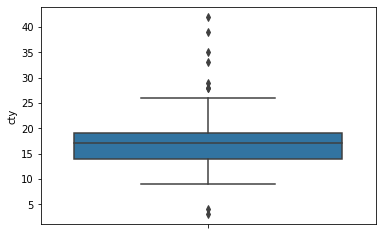

In [ ]:
sns.boxplot(data=mpg, y='cty')

In [ ]:
q1 = mpg['cty'].quantile(.25)
q3 = mpg['cty'].quantile(.75)
iqr = q3 - q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
mpg['cty'] = np.where((mpg['cty'] < lower_bound) | (mpg['cty'] > upper_bound), np.nan, mpg['cty'])

<AxesSubplot:ylabel='cty'>

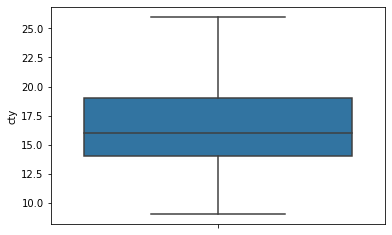

In [ ]:
sns.boxplot(data=mpg, y='cty')

In [ ]:
mpg = mpg.dropna()
mpg.groupby('drv').agg({'cty':'mean'})

,cty
drv,
4,14.247423
f,19.470000
r,13.958333


# Do it! 쉽게 배우는 파이썬 데이터 분석 - 8장

## 08-2 산점도

In [ ]:
mpg = pd.read_csv('mpg.csv')

<AxesSubplot:xlabel='displ', ylabel='hwy'>

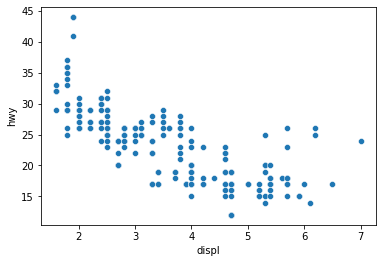

In [ ]:
sns.scatterplot(data=mpg, x='displ', y='hwy')

[(3.0, 6.0)]

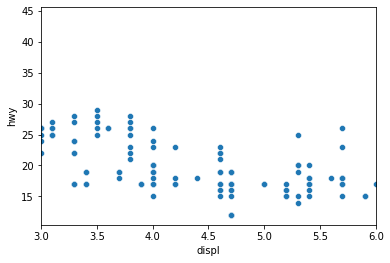

In [ ]:
sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim=(3,6))

[(3.0, 6.0), (10.0, 30.0)]

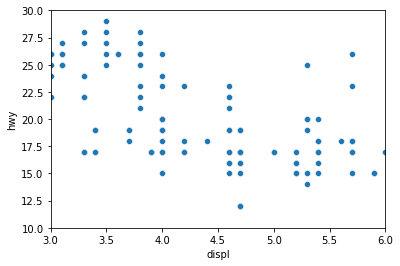

In [ ]:
sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim=(3,6), ylim=(10,30))

<AxesSubplot:xlabel='displ', ylabel='hwy'>

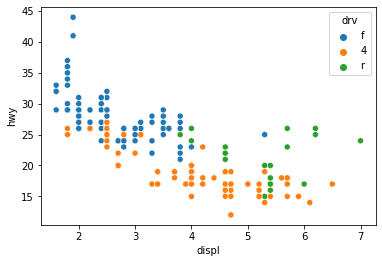

In [ ]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')

<AxesSubplot:xlabel='cty', ylabel='hwy'>

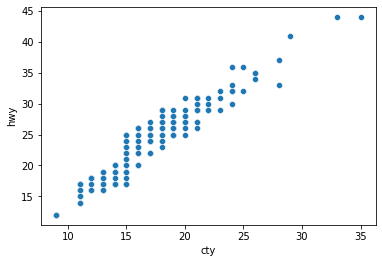

In [ ]:
sns.scatterplot(data=mpg, x='cty', y='hwy')

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/youngwoos/Doit_Python/main/Data/midwest.csv','midwest.csv')

('midwest.csv', <http.client.HTTPMessage at 0x2896dafa0>)

In [ ]:
midwest = pd.read_csv('midwest.csv')

[(0.0, 500000.0), (0.0, 10000.0)]

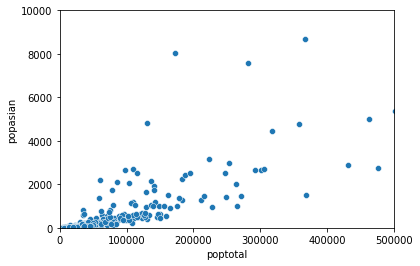

In [ ]:
sns.scatterplot(data=midwest, x='poptotal', y='popasian').set(xlim=(0,500000), ylim=(0,10000))

## 막대 그래프

In [ ]:
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy = ('hwy','mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

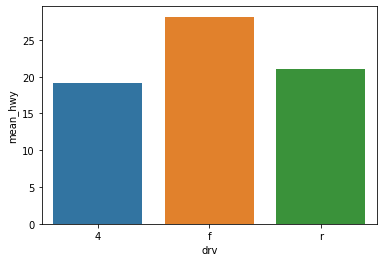

In [ ]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

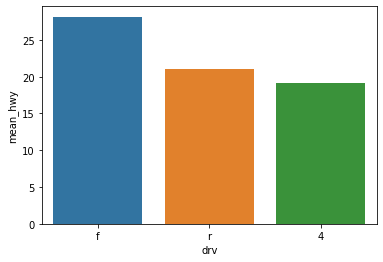

In [ ]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [ ]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n=('drv','count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<AxesSubplot:xlabel='drv', ylabel='n'>

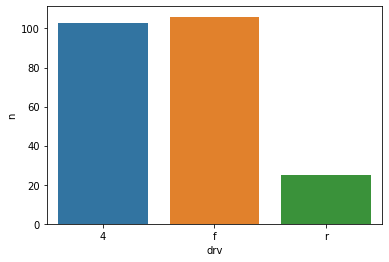

In [ ]:
sns.barplot(data=df_mpg, x='drv', y='n')

<AxesSubplot:xlabel='drv', ylabel='count'>

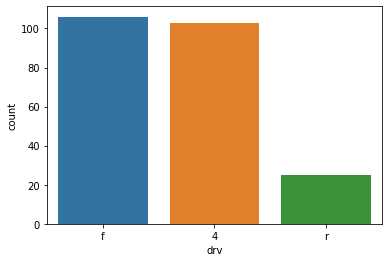

In [ ]:
sns.countplot(data=mpg, x='drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

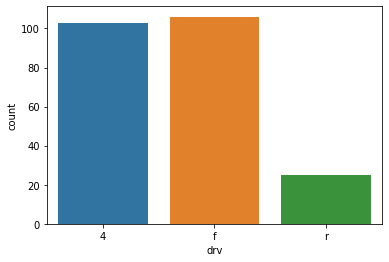

In [ ]:
sns.countplot(data=mpg, x='drv', order=df_mpg['drv'].unique())

<AxesSubplot:xlabel='manufacturer', ylabel='mean_cty'>

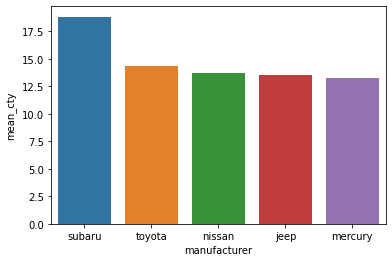

In [ ]:
df_mpg = mpg[mpg['category']=='suv'].groupby('manufacturer', as_index=False).agg(mean_cty = ('cty','mean'))
df_mpg = df_mpg.sort_values(['mean_cty'], ascending=False).head()
sns.barplot(data=df_mpg, x='manufacturer', y='mean_cty')

In [ ]:
mpg['category'].value_counts().to_frame()

,category
suv,62
compact,47
midsize,41
subcompact,35
pickup,33
minivan,11
2seater,5


<AxesSubplot:xlabel='category', ylabel='count'>

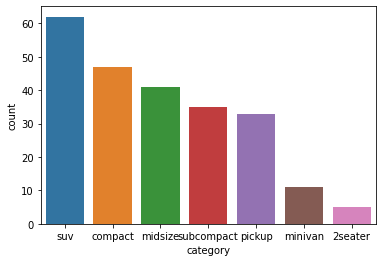

In [ ]:
sns.countplot(data=mpg, x='category', order=mpg['category'].value_counts().index)

## 선 그래프

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/youngwoos/Doit_Python/main/Data/economics.csv','economics.csv')

('economics.csv', <http.client.HTTPMessage at 0x28966ec10>)

In [ ]:
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<AxesSubplot:xlabel='date', ylabel='unemploy'>

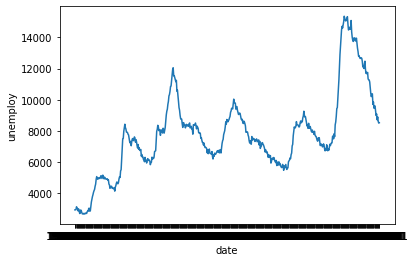

In [ ]:
sns.lineplot(data=economics, x='date', y='unemploy')

In [ ]:
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [ ]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='unemploy'>

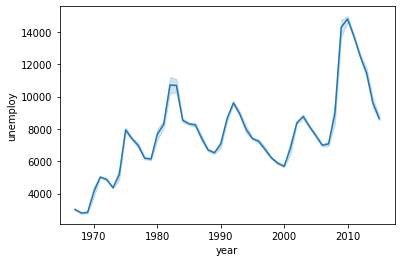

In [ ]:
sns.lineplot(data=economics, x='year', y='unemploy')

<AxesSubplot:xlabel='year', ylabel='unemploy'>

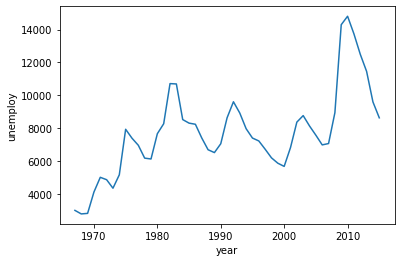

In [ ]:
sns.lineplot(data=economics, x='year', y='unemploy', ci=None)

## 08-5 상자 그림

<AxesSubplot:xlabel='drv', ylabel='hwy'>

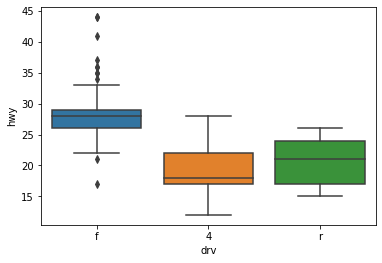

In [ ]:
sns.boxplot(data=mpg, x='drv', y='hwy')

<AxesSubplot:xlabel='category', ylabel='cty'>

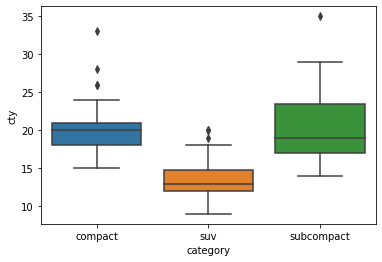

In [ ]:
sns.boxplot(data=mpg[mpg['category'].isin(['compact','subcompact','suv'])], x='category', y='cty')